In [39]:
#importing library
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
import warnings
warnings.filterwarnings("ignore")

In [40]:
df=read_csv('glass.csv')
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [41]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# EDA Data cleaning

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [43]:
df.duplicated().sum()

1

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# splitting the data

In [45]:
array = df.values


X = array[:, 0:-1]
Y = array[:, -1]

In [46]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [47]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

# normalizing the data(scaling)

In [48]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [49]:
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

# dividing the data in two parts
# Train Data
# Test Data

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=19)

In [37]:
n_neighbors=[2*i+1 for i in range(0,27)]
for n in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy_score(y_test,pred)
    
    print(classification_report(y_test,pred),n)

              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78        23
         2.0       0.64      0.67      0.65        21
         3.0       0.33      0.50      0.40         2
         5.0       0.40      1.00      0.57         2
         6.0       1.00      0.40      0.57         5
         7.0       1.00      0.83      0.91        12

    accuracy                           0.72        65
   macro avg       0.69      0.70      0.65        65
weighted avg       0.77      0.72      0.73        65
 1
              precision    recall  f1-score   support

         1.0       0.72      0.78      0.75        23
         2.0       0.67      0.67      0.67        21
         3.0       1.00      0.50      0.67         2
         5.0       0.20      0.50      0.29         2
         6.0       1.00      0.40      0.57         5
         7.0       0.91      0.83      0.87        12

    accuracy                           0.71        65
   macro avg       0.

              precision    recall  f1-score   support

         1.0       0.64      0.61      0.62        23
         2.0       0.54      0.67      0.60        21
         3.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         5
         7.0       0.59      0.83      0.69        12

    accuracy                           0.58        65
   macro avg       0.29      0.35      0.32        65
weighted avg       0.51      0.58      0.54        65
 41
              precision    recall  f1-score   support

         1.0       0.64      0.61      0.62        23
         2.0       0.48      0.57      0.52        21
         3.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         5
         7.0       0.56      0.83      0.67        12

    accuracy                           0.55        65
   macro avg       0

# Visualizing CV result

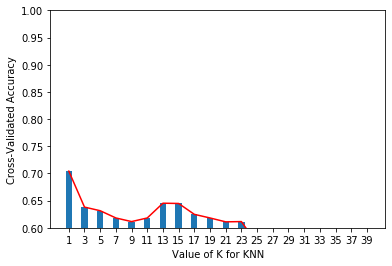

In [51]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train,cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.5,1)
plt.show()

In [52]:
np.argmax(k_scores)

0

In [53]:
k_range[1]

3

In [54]:
k_scores[3]

0.6180952380952381

# now build the model

In [55]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred=model.predict(x_test)

# Testing model with Test Data

In [56]:
accuracy_score(pred,y_test)

0.676923076923077

# Classification Report

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        20
         2.0       0.72      0.59      0.65        22
         3.0       0.00      0.00      0.00         4
         5.0       0.60      0.43      0.50         7
         6.0       1.00      0.50      0.67         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.68        65
   macro avg       0.64      0.57      0.58        65
weighted avg       0.66      0.68      0.65        65

